In [ ]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd
from matplotlib.cm import get_cmap

import re
cmap = get_cmap('Spectral')

In [ ]:
# Fast Sim

file = "../config/workdir/fastsim/Next100_500keVeminus_fastsim_esmeralda.h5"

hits = pd.read_hdf(file, "MC/hits")
chits = pd.read_hdf(file, "/CHITS/highTh")
display(chits)

# Plot the hits
plt.figure()
plt.scatter(hits.x, hits.y, c=hits.time)



,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,0,0.734405,-1.0,1,27,-9.580675,17.967413,600.329188,21.155822,-23.325,7.775,595.897339,10.99551,7.775,38.875,604.171265,45.335651,False


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,0,1635865.892,0.0,-9.255749,14.164287,1.0,-7.775,-23.325,0.0,0.0,590.728760,5.217391,1551.043190,-1,0.004864,-1,-1
1,0,1635865.892,0.0,-9.255749,14.164287,1.0,-23.325,7.775,0.0,0.0,590.728760,5.507246,1637.212233,-1,0.005134,-1,-1
2,0,1635865.892,0.0,-9.255749,14.164287,1.0,-7.775,38.875,0.0,0.0,590.728760,5.391304,1602.744616,-1,0.005026,-1,-1
3,0,1635865.892,0.0,-9.255749,14.164287,1.0,-7.775,-7.775,0.0,0.0,591.765503,7.594203,816.376837,-1,0.002571,-1,-1
4,0,1635865.892,0.0,-9.255749,14.164287,1.0,-23.325,7.775,0.0,0.0,591.765503,7.072464,760.289893,-1,0.002394,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,1635865.892,0.0,-9.255749,14.164287,1.0,-23.325,7.775,0.0,0.0,614.547485,13.275362,765.602652,-1,0.002415,-1,-1
354,0,1635865.892,0.0,-9.255749,14.164287,1.0,-7.775,7.775,0.0,0.0,614.547485,5.043478,290.862163,-1,0.000917,-1,-1
355,0,1635865.892,0.0,-9.255749,14.164287,1.0,-7.775,23.325,0.0,0.0,614.547485,5.275362,304.235132,-1,0.000960,-1,-1
356,0,1635865.892,0.0,-9.255749,14.164287,1.0,7.775,7.775,0.0,0.0,614.547485,8.057971,464.710790,-1,0.001466,-1,-1


0.7344054643620626


,event,hit_tot_energy
0,0,0.734405


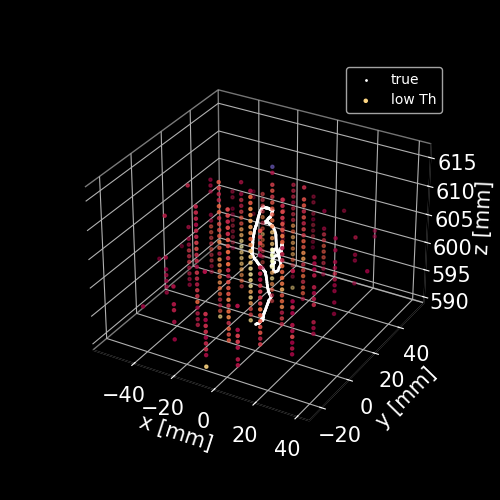

In [22]:
# Fast Sim

base = "Next100_500keVeminus"
# base = "Next100_2.5MeVeminus"

file = f"../config/workdir/fullsim/{base}_fullsim_esmeralda.h5"

hits = pd.read_hdf(file, "MC/hits")
# tracks = pd.read_hdf(file, "/Tracking/Tracks")
chitshighTh = pd.read_hdf(file, "/CHITS/highTh")
# display(chitshighTh.describe())
# display(tracks)
summary = pd.read_hdf(file, "/Summary/Events")
display(summary)

# chits = pd.read_hdf(file, "/CHITS/highTh")
file = f"../config/workdir/fullsim/{base}_sophronia_lowth.h5"
chits = pd.read_hdf(file, "/lowTh")
display(chits)
print(chits.Ec.sum())

Energy = chitshighTh.groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')
# Energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
display(Energy)

# Plot the hits
%matplotlib widget
# Make a 3D view of the track
fig  = plt.figure(figsize=(5, 5))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
ax.scatter(hits.x, hits.y,  hits.z,color="white", s=1, label = "true")
ax.scatter(chits.X, chits.Y,  chits.Z,c=chits.E, s=5,cmap='Spectral', label = "low Th")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to whiteptdu
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

,event,peak,time,bwidth,ene
0,0,0,516567.84375,900.0,7.0
1,0,0,517553.56250,1000.0,28.0
2,0,0,518585.87500,1000.0,85.0
3,0,0,519568.84375,1000.0,215.0
4,0,0,520551.40625,1000.0,458.0
...,...,...,...,...,...
175,0,0,691461.81250,1000.0,314.0
176,0,0,692380.31250,1000.0,184.0
177,0,0,693370.75000,1000.0,65.0
178,0,0,694421.68750,1000.0,30.0


,event_id,particle_id,hit_id,x,y,z,time,energy,label
0,0,1,0,-265.931671,43.310680,694.303345,1.860507,0.000022,ACTIVE
1,0,1,1,-207.474304,10.641059,656.175842,1.332300,0.000022,ACTIVE
2,0,1,2,-170.604263,-19.218039,562.494080,0.795939,0.000022,ACTIVE
3,0,1,3,-170.630219,-19.452265,562.500183,0.788203,0.000022,ACTIVE
4,0,1,4,-129.746185,-7.506716,535.943359,0.633000,0.000022,ACTIVE
...,...,...,...,...,...,...,...,...,...
112004,0,1,112004,-0.128675,-0.103725,593.703796,0.000626,0.000022,ACTIVE
112005,0,1,112005,-0.102067,-0.081887,593.700684,0.001028,0.000022,ACTIVE
112006,0,1,112006,-0.037057,-0.028968,593.690918,0.000506,0.000022,ACTIVE
112007,0,1,112007,-0.018232,-0.013954,593.687927,0.000079,0.000022,ACTIVE


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,692.541260,37.623188,3167.664083,-1.0,0.010388,0,0.010388
1,0,131560.887,0,-183.508204,3.851874,1,-287.675,54.425,0.0,0.0,692.541260,41.159420,3465.395234,-1.0,0.011364,0,0.011364
2,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,693.578674,31.652174,2807.832363,-1.0,0.009209,0,0.009209
3,0,131560.887,0,-183.508204,3.851874,1,-287.675,54.425,0.0,0.0,693.578674,42.956520,3810.629478,-1.0,0.012498,0,0.012498
4,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,694.623840,46.144928,4610.497488,-1.0,0.015118,0,0.015118
5,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,695.657288,51.304348,4077.713045,-1.0,0.013376,0,0.013376
6,0,131560.887,0,-183.508204,3.851874,1,-287.675,54.425,0.0,0.0,695.657288,34.202900,2718.475464,-1.0,0.008917,0,0.008917
7,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,696.695435,41.797100,4775.520771,-1.0,0.015660,0,0.015660
8,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,697.727234,42.956520,4526.044877,-1.0,0.014849,0,0.014849
9,0,131560.887,0,-183.508204,3.851874,1,-287.675,54.425,0.0,0.0,697.727234,31.014492,3267.792236,-1.0,0.010721,0,0.010721


,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,0,2.503197,-1.0,1,38,-260.61975,41.368289,689.413298,263.926723,-287.675,38.875,687.354126,244.139952,-241.025,54.425,698.758545,292.778049,False


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1226,0,131560.887,0,-183.508204,3.851874,1,-318.775,38.875,0.0,0.0,694.62384,10.144928,331.043579,-1.0,0.001090,-1,-1.0
1227,0,131560.887,0,-183.508204,3.851874,1,-318.775,54.425,0.0,0.0,694.62384,6.840580,223.217926,-1.0,0.000740,-1,-1.0
1228,0,131560.887,0,-183.508204,3.851874,1,-303.225,23.325,0.0,0.0,694.62384,12.579710,410.493988,-1.0,0.001351,-1,-1.0
1229,0,131560.887,0,-183.508204,3.851874,1,-303.225,38.875,0.0,0.0,694.62384,13.043478,425.627411,-1.0,0.001401,-1,-1.0
1230,0,131560.887,0,-183.508204,3.851874,1,-303.225,54.425,0.0,0.0,694.62384,17.217392,561.828186,-1.0,0.001861,-1,-1.0
1231,0,131560.887,0,-183.508204,3.851874,1,-287.675,7.775,0.0,0.0,694.62384,6.956522,227.001282,-1.0,0.000742,-1,-1.0
1232,0,131560.887,0,-183.508204,3.851874,1,-287.675,23.325,0.0,0.0,694.62384,11.536232,376.443787,-1.0,0.001233,-1,-1.0
1233,0,131560.887,0,-183.508204,3.851874,1,-287.675,38.875,0.0,0.0,694.62384,46.144928,1505.775146,-1.0,0.004931,-1,-1.0
1234,0,131560.887,0,-183.508204,3.851874,1,-287.675,54.425,0.0,0.0,694.62384,29.217392,953.405396,-1.0,0.003142,-1,-1.0
1235,0,131560.887,0,-183.508204,3.851874,1,-272.125,7.775,0.0,0.0,694.62384,8.000000,261.051483,-1.0,0.000853,-1,-1.0


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,0,131560.887,0.0,-183.508204,3.851874,1.0,-132.175,-7.775,0.0,0.0,531.535461,9.391304,1762.999930,-1,0.005589,-1,-1
1,0,131560.887,0.0,-183.508204,3.851874,1.0,-147.725,7.775,0.0,0.0,532.568726,7.014493,1478.000000,-1,0.004665,-1,-1
2,0,131560.887,0.0,-183.508204,3.851874,1.0,-147.725,-7.775,0.0,0.0,533.587219,6.782609,303.549997,-1,0.000957,-1,-1
3,0,131560.887,0.0,-183.508204,3.851874,1.0,-132.175,-23.325,0.0,0.0,533.587219,6.492754,290.577778,-1,0.000917,-1,-1
4,0,131560.887,0.0,-183.508204,3.851874,1.0,-132.175,-7.775,0.0,0.0,533.587219,9.043478,404.733330,-1,0.001277,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,131560.887,0.0,-183.508204,3.851874,1.0,-287.675,38.875,0.0,0.0,704.968506,7.942029,570.663559,-1,0.001875,-1,-1
1457,0,131560.887,0.0,-183.508204,3.851874,1.0,-287.675,54.425,0.0,0.0,704.968506,9.101449,653.972088,-1,0.002149,-1,-1
1458,0,131560.887,0.0,-183.508204,3.851874,1.0,-272.125,38.875,0.0,0.0,704.968506,7.884058,566.498133,-1,0.001861,-1,-1
1459,0,131560.887,0.0,-183.508204,3.851874,1.0,-272.125,54.425,0.0,0.0,704.968506,6.260870,449.866158,-1,0.001478,-1,-1


,event,hit_tot_energy
0,0,2.503197


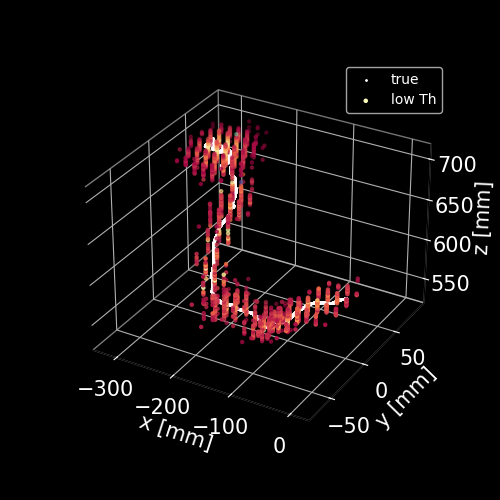

In [25]:
base = "Next100_2.5MeVeminus_degrad"
# base = "Next100_500keVeminus_degrad"


file = f"../config/workdir/degrad/{base}_hypathia.h5"

pmaps = pd.read_hdf(file, "/PMAPS/S2")
display(pmaps)

hits = pd.read_hdf(file, "MC/hits")
display(hits)

file = f"../config/workdir/degrad/{base}_esmeralda.h5"
chitshighTh = pd.read_hdf(file, "/CHITS/highTh")
display(chitshighTh)
summary = pd.read_hdf(file, "/Summary/Events")
display(summary)

file = f"../config/workdir/degrad/{base}_sophronia.h5"
chitshighTh_soph = pd.read_hdf(file, "/RECO/Events")
display(chitshighTh_soph[ (chitshighTh_soph.Z>694) & (chitshighTh_soph.Z < 695)])

file = f"../config/workdir/degrad/{base}_sophronia_lowth.h5"
chits = pd.read_hdf(file, "/lowTh")
display(chits)

Energy = chitshighTh.groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')
# Energy = hits.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')
display(Energy)

# Plot the hits
%matplotlib widget
# Make a 3D view of the track
fig  = plt.figure(figsize=(5, 5))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
ax.scatter(hits.x, hits.y,  hits.z,color="white", s=1, label = "true")
ax.scatter(chits.X, chits.Y,  chits.Z,c=chits.E, s=5,cmap='Spectral', label = "low Th")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to whiteptdu
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

In [ ]:
plt.figure()
plt.scatter(chitshighTh.X,  chitshighTh.Z,c=chitshighTh.Ec, label = "low Th")

In [ ]:
# file = "../config/Next100_500keVeminus_degrad_esmeralda.h5"
file1 = "../config/workdir/degrad/Next100_500keVeminus_degrad.h5"
file2 = "../config/workdir/fullsim/Next100_500keVeminus_fullsim.h5"

degrad = pd.read_hdf(file1, "MC/configuration")
fullsim = pd.read_hdf(file2, "MC/configuration")

display(degrad)
display(fullsim)

In [ ]:
import h5py

def print_h5_tables(filename):
    with h5py.File(filename, 'r') as f:
        # Iterate over the datasets in the file
        for name in f:
            # Check if the dataset is a table (a group)
            if isinstance(f[name], h5py.Group):
                print("Table:", name)
                # Print information about the table (group)
                print(f[name])
                print("Attributes:")
                for attr_name, attr_value in f[name].attrs.items():
                    print(f"  {attr_name}: {attr_value}")
                print("Dataset names:")
                for dataset_name in f[name]:
                    print(f"  {dataset_name}")

# Replace 'your_file.h5' with the path to your HDF5 file
# print_h5_tables("../config/workdir/fullsim/Next100_500keVeminus_fullsim.h5")
# print("")
print_h5_tables("../config/workdir/degrad/Next100_500keVeminus_degrad.h5")
print("")
print_h5_tables("../config/workdir/degrad/Next100_500keVeminus_degrad_slim.h5")

,event_id,sensor_id,time_bin,charge,sensor_name,x,y,z
0,0,58,1,1,PmtR11410,128.821655,-426.682953,1467.720947
1,0,58,2,1,PmtR11410,128.821655,-426.682953,1467.720947
2,0,58,8,1,PmtR11410,128.821655,-426.682953,1467.720947
3,0,58,22506,1,PmtR11410,128.821655,-426.682953,1467.720947
4,0,58,22568,1,PmtR11410,128.821655,-426.682953,1467.720947
...,...,...,...,...,...,...,...,...
57933,0,37,23776,1,PmtR11410,253.699997,439.412689,1467.720947
57934,0,37,23798,1,PmtR11410,253.699997,439.412689,1467.720947
57935,0,37,23804,1,PmtR11410,253.699997,439.412689,1467.720947
57936,0,37,23808,1,PmtR11410,253.699997,439.412689,1467.720947


,event_id,sensor_id,time_bin,charge,sensor_name,x,y,z
0,0,18,0,1,PmtR11410,378.700012,6.400000,1467.720947
1,0,18,1,1,PmtR11410,378.700012,6.400000,1467.720947
2,0,18,2,2,PmtR11410,378.700012,6.400000,1467.720947
3,0,18,4,1,PmtR11410,378.700012,6.400000,1467.720947
4,0,18,13,1,PmtR11410,378.700012,6.400000,1467.720947
...,...,...,...,...,...,...,...,...
38890,0,37,23236,1,PmtR11410,253.699997,439.412689,1467.720947
38891,0,37,23253,1,PmtR11410,253.699997,439.412689,1467.720947
38892,0,37,23268,1,PmtR11410,253.699997,439.412689,1467.720947
38893,0,37,23286,1,PmtR11410,253.699997,439.412689,1467.720947


Text(0.5, 1.0, 'PMT Hits')

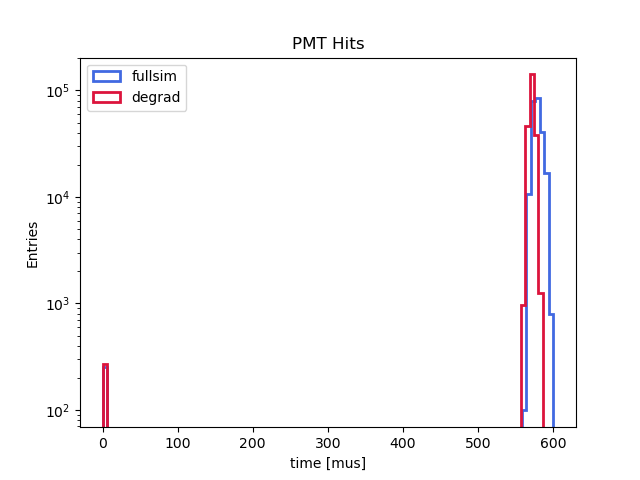

In [26]:
# Compare the full 
fullsim = "../config/workdir/fullsim/Next100_500keVeminus_fullsim.h5"
degrad = "../config/workdir/degrad/Next100_500keVeminus_degrad.h5"

sns_response = pd.read_hdf(fullsim, "MC/sns_response")
sns_positions = pd.read_hdf(fullsim, "MC/sns_positions")
sns_positions_pmt = sns_positions[sns_positions.sensor_name == "PmtR11410"]

merged_df_pmt_fullsim = pd.merge(sns_response, sns_positions_pmt, on='sensor_id', how='right')
display(merged_df_pmt_fullsim)

sns_response = pd.read_hdf(degrad, "MC/sns_response")
sns_positions = pd.read_hdf(degrad, "MC/sns_positions")
sns_positions_pmt = sns_positions[sns_positions.sensor_name == "PmtR11410"]

merged_df_pmt_degrad = pd.merge(sns_response, sns_positions_pmt, on='sensor_id', how='right')
display(merged_df_pmt_degrad)


plt.figure()
bins_ =  np.linspace(0,100,100)
bins_ = 100
plt.hist(merged_df_pmt_fullsim.time_bin*25*1e-3, weights = merged_df_pmt_fullsim.charge, bins = bins_, label = "fullsim",histtype = "step", color = "royalblue",linewidth = 2, log=True);
plt.hist(merged_df_pmt_degrad.time_bin*25*1e-3, weights = merged_df_pmt_degrad.charge, bins = bins_, label = "degrad",histtype = "step", color = "crimson",linewidth = 2, log=True);
plt.legend(loc = "upper left")
plt.xlabel("time [mus]")
plt.ylabel("Entries")
plt.title("PMT Hits")



In [ ]:
degrad = "../config/workdir/degrad/Next100_500keVeminus_degrad_hypathia.h5"
pmaps = pd.read_hdf(degrad, "/PMAPS/S2")

display(pmaps)

In [ ]:
degrad = "../config/workdir/degrad/Next100_500keVeminus_degrad_hypathia.h5"

config = pd.read_hdf(degrad, "MC/Con")

!ls -l $degrad